## K-Nearest Neighbors (KNN) - Supervised regression model

Het k-Nearest Neighbors algoritme (KNN) is een supervised learning regression techniek. Het lokaliseert de k meest vergelijkbare instanties in de trainingsgegevensset voor een nieuwe gegevensinstantie.

KNN is op zich een eenvoudig concept: definieer een afstandsmetriek tussen de items in jouw dataset en vind de K dichtstbijzijnde items. Je kunt die items dan gebruiken om een eigenschap van een testitem te voorspellen, door ze er op de een of andere manier op te laten "stemmen".

Van belang is de gebruikte afstandsmetriek (het metrische argument). De *Minkowski*-afstand wordt standaard gebruikt, wat een generalisatie is van zowel de *Euclidische*-afstand (gebruikt wanneer alle invoer dezelfde schaal heeft) als de *Manhattan*-afstand (gebruikt wanneer de schalen van de invoervariabelen verschillen).

#### Referenties
1. Diverse voorbeelden zijn een bewerking van de __[scikit-learn tutorial](https://github.com/jakevdp/sklearn_tutorial)__ van Jack Vanderplas.
2. Meer weten over `scikit-learn`:__[Scikit-learn
Machine Learning in Python](https://scikit-learn.org/stable/)__
3. Mastery Learning: [k-nearest-neighbors](https://machinelearningmastery.com/k-nearest-neighbors-for-machine-learning/)
4. Mastery learning: [Machine Learning Step-by-Step](https://machinelearningmastery.com/machine-learning-in-python-step-by-step/)

---

### Helper functions

In [1]:
%matplotlib inline

import sys
import os
from pathlib import Path
from packaging import version
import matplotlib.pyplot as plt
import pandas as pd

# Excel CSV-file
def load_csv_pd_data(path, filename, 
                     names=None, 
                     delim_whitespace=False
                    ):
    '''
    load_csv_pd_data() - construct a pandas DataFrame object 
           from data in a Excel CSV file `filename`,
           stored in a folder `path`.
           @names: header-names of columns
    @returns: a pandas DataFrame
    '''
    csv_path = os.path.join(path, filename)
    # DEBUG: print(csv_path)
    return pd.read_csv(csv_path,
                       delim_whitespace=delim_whitespace,
                       names=names
                      )

# Excel XLS-file
def load_xls_pd_data(path, filename, 
                     names=None
                    ):
    '''
    load_xls_pd_data() - construct a pandas DataFrame object 
           from data in a Excel xls-file `filename`,
           stored in a folder `path`.
    @returns: a pandas DataFrame
    '''
    xls_path = os.path.join(path, filename)
    # DEBUG: print(xls_path)
    return pd.read_excel(xls_path,
                         names=names
                        )

# Create the `images/training_linear_models` folder
IMAGES_PATH = Path() / "images" / "training_KNN_models"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, 
                format=fig_extension, 
                dpi=resolution
    )

## Eenvoudig voorbeeld KNN

In deze dataset heb je twee *features* (`weer` en `temperatuur`) en één label (`play`). Bedoeling is dat het `weer` en de `temperatuur` bepalen of je wel/niet buiten kan spelen.

Bron: https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn

In [2]:
# define dataset

# Assigning features and label variables

# First Feature
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']

# Second Feature
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

# Label or target varible
play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

### Gegevenskolommen coderen

Verschillende algoritmen voor machine learning vereisen numerieke invoergegevens, dus je moet categorische kolommen in een numerieke kolom weergeven.

Om deze gegevens te coderen, kun je elke waarde aan een getal toewijzen. bijv. Bewolkt:0, Regenachtig:1 en Zonnig:2.

Dit proces staat bekend als labelcodering en scikit-learn zal dit gemakkelijk voor je maken met behulp van `LabelEncoder`.

In [3]:
# Import LabelEncoder
from sklearn import preprocessing

# creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
weather_encoded=le.fit_transform(weather)
print(weather_encoded)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]


Op dezelfde manier kun je temperatuur en label coderen in numerieke kolommen:

In [4]:
# converting string labels into numbers
temp_encoded=le.fit_transform(temp)
label=le.fit_transform(play)
print(f"Temperature encode:{temp_encoded}")
print(48*"-")
print(f"Labels:{label}")

Temperature encode:[1 1 1 2 0 0 0 2 0 2 2 2 1 2]
------------------------------------------------
Labels:[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


Vervolgens combineer je meerdere kolommen of functies in een enkele set gegevens met behulp van Python's `zip` functie:

In [5]:
# combining weather and temp into single list of tuples
features=list(zip(weather_encoded,temp_encoded))
features  # DEBUG

[(np.int64(2), np.int64(1)),
 (np.int64(2), np.int64(1)),
 (np.int64(0), np.int64(1)),
 (np.int64(1), np.int64(2)),
 (np.int64(1), np.int64(0)),
 (np.int64(1), np.int64(0)),
 (np.int64(0), np.int64(0)),
 (np.int64(2), np.int64(2)),
 (np.int64(2), np.int64(0)),
 (np.int64(1), np.int64(2)),
 (np.int64(2), np.int64(2)),
 (np.int64(0), np.int64(2)),
 (np.int64(0), np.int64(1)),
 (np.int64(1), np.int64(2))]

Laten we een KNN-classificatiemodel bouwen.

Importeer eerst de `KNeighborsClassifier` module en maak een `KNN-classificatie` object met als het argument het aantal buren door te geven in de `KNeighborsClassifier()`functie.

Pas vervolgens het model op de dataset met behulp van `fit()` en voer een voorspelling uit op de testset met `predict()`.

In [6]:
from sklearn.neighbors import KNeighborsClassifier

# model
model = KNeighborsClassifier(n_neighbors=3)

# Train the model
model.fit(features, label)

#Predict Output
predicted= model.predict([[0,2]]) # 0:Overcast, 2:Mild
print(predicted)  # result: 1:Play

[1]


In het bovenstaande voorbeeld heb je invoer [0,2] gegeven, waarbij 0 Bewolkt weer betekent en 2 Milde temperatuur. Het model voorspelt [1], hetgeen 'spelen' betekent.

In [7]:
# performance of KNN classifier

from sklearn.metrics import confusion_matrix

# predict for all features
predicted= model.predict(features)  # all features
#print(predicted)

# calculate confusion matrix
matrix = confusion_matrix(label, predicted)
print(matrix)

[[3 2]
 [2 7]]


In [8]:
from sklearn.metrics import classification_report

# print clasification report
report = classification_report(label, predicted) 
print(report)

              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.78      0.78      0.78         9

    accuracy                           0.71        14
   macro avg       0.69      0.69      0.69        14
weighted avg       0.71      0.71      0.71        14



---

## Voorbeeld KNN op de wijnen dataset

Bovenstaande vorbeeld ging over het voorspellen met twee variablen, in dit voorbeeld gaat het over voorspellen met meerdere variabelen.

In dit voorbeeld wordt de wijndataset gebruikt, een zeer bekend classificatieprobleem met meerdere klassen. 

De wijngegevens zijn het resultaat van een chemische analyse van wijnen die in dezelfde regio in Italië zijn geteeld met behulp van drie verschillende *cultivars*. De analyse bepaalde de hoeveelheden van 13 bestanddelen die in elk van de drie soorten wijn werden aangetroffen.

De dataset omvat 13 kenmerken ('alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline') en één target (soort cultivars).

Er zijn drie soorten cultivar-klassen: 'class_0', 'class_1' en 'class_2'. 

Hiermee kun je een model bouwen om het type cultivar te classificeren. 

De dataset is beschikbaar in de scikit-learn, of, je download deze dataset van de [UCI Machine Learning-bibliotheek](https://archive.ics.uci.edu/ml/index.php).

In [9]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
wine = datasets.load_wine()

In [10]:
# explore dataset
# print the names of the features
print(wine.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [11]:
# print the label species(class_0, class_1, class_2)
print(wine.target_names)

['class_0' 'class_1' 'class_2']


In [12]:
# print the wine data (top 5 records)
print(wine.data[0:5])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]


In [13]:
# print the wine labels (0:Class_0, 1:Class_1, 2:Class_3)
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [14]:
# print data(feature)shape
print(wine.data.shape)

# print target(or label)shape
print(wine.target.shape)

(178, 13)
(178,)


In [15]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(
    wine.data, wine.target, test_size=0.3)

### Hoe bepaal je het aantal buren (k-value) in KNN?

Op dit punt rijst de vraag hoe het optimale aantal buren te kiezen? En wat zijn de effecten op de classifier? 

Het aantal buren (K) in KNN is een *hyperparameter* die je moet kiezen op het moment van modelbouw. Je kunt K zien als een controlerende variabele voor het voorspellingsmodel.

Onderzoek heeft aangetoond dat er geen optimaal aantal buren geschikt is voor alle soorten datasets. Elke dataset heeft zijn eigen vereisten. In het geval van een klein aantal buren zal de ruis een grotere invloed hebben op het resultaat, en een groot aantal buren maakt het rekenkundig duur. Onderzoek heeft ook aangetoond dat een klein aantal buren het meest flexibel past, wat een lage bias maar een hoge variantie zal hebben, en een groot aantal buren zal een soepelere beslissingsgrens hebben, wat een lagere variantie maar een hogere bias betekent.

Over het algemeen kiezen datawetenschappers een oneven getal als het aantal klassen even is. 

Je kunt dit ook controleren door het model op verschillende waarden van K te genereren en hun prestaties te controleren.

PS. Je hebt ook een **Elbow** methode. Deze methode helpt je om het optimale aantal clusters voor KNN-clustering te selecteren. Het is een van de meest populaire methoden om deze optimale waarde van K te bepalen. Voor meer informatie, zie artikel [Elbow Methd in Supervised Learning (optimal K value)](https://medium.com/@moussadoumbia_90919/elbow-method-in-supervised-learning-optimal-k-value-99d425f229e7).

## Eenvoudig voorbeeld KNN Regression met KFold

Je kunt een KNN-model voor regressie construeren met behulp van de `KNeighborsRegressor` class uit `scikit-learn`, zoals volgend voorbeeld laat zien.

Met `KFold` kan je de nauwkeurigheid van een voorspelling vergroten.

In [16]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

# load dataset
path = './data/'
filename = 'housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']
dataframe = load_csv_pd_data(
    path, filename, 
    delim_whitespace=True,
    names=names
)
#print(dataframe.head())
column_size=dataframe.shape[1] - 1
#print('-'*40)

array = dataframe.to_numpy()  # deprecated: dataframe.values

X = array[:,0:column_size]
Y = array[:,column_size]

kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = KNeighborsRegressor()

scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, 
                          cv=kfold, scoring=scoring
                         ) 
print(results.mean())

-38.852320266666666


C:\Users\hq0132410\AppData\Local\Temp\ipykernel_4652\4096696434.py:24: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  return pd.read_csv(csv_path,


## Eenvoudig voorbeeld KNN Classification met KFold

In [17]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

path = './data/'
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = load_csv_pd_data(
    path, filename, 
    names=names
)
print(dataframe.head())
print('-'*40)

# prepare data for scikit-learn
array = dataframe.to_numpy()  # deprecated: dataframe.values

# split column 8
X = array[:,0:8]
Y = array[:,8]

kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = KNeighborsClassifier()

results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

   preg  plas  pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1
----------------------------------------
0.7109876965140123


C:\Users\hq0132410\AppData\Local\Temp\ipykernel_4652\4096696434.py:24: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  return pd.read_csv(csv_path,


## Voorbeeld KNN - voorspellen Iris bloemen

Dataset: iris.data.csv

In dit voorbeeld gaan we een klein machine learning-project `end-to-end` doorlopen, waarbij o.a. KNN als voorspellingsmodel is gebruikt.

Dit is ook een voorbeeld wat bij de uitwerking van jullie eigen casus van toepassing is, namelijk meerdere classificatiemodellen gebruiken en het gebruiken van een gestructureerde werkwijze (*data science workflow*).

Hier is een overzicht van wat we gaan behandelen: 
1. Laden van de dataset.
2. Samenvatten van de dataset.
3. Visualiseren van de dataset.
4. Evaluatie van enkele algoritmen. 
5. Het maken van enkele voorspellingen.

Neem de tijd en doorloop elke stap.

### Vraagstuk formuleren

Aan de hand van een aantal Iris bloemmetingen willen we voorspellen of de bloem is een (Iris)setosa, (Iris)versicolor of (Iris)virginica.

In [18]:
# Load libraries

import sys
print(f'Python: {sys.version}')

from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

# performance metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# models - take them for granted at the moment
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

Python: 3.11.9 (tags/v3.11.9:de54cf5, Apr  2 2024, 10:12:12) [MSC v.1938 64 bit (AMD64)]


### 1. Laden van de Iris dataset

We nemen de dataset uit de bibliotheel scikit-learn.

In [19]:
# Load Iris dataset from scikit-learn
# see werkcollege 1 - dataset extra
from sklearn import datasets
import seaborn as sns

# helper for conversion scikit-learn 
# dataset (Bunch object) to pandas DataFrame
def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(
        sklearn_dataset.data, 
        columns=sklearn_dataset.feature_names
    )
    df['target'] = pd.Series(
        sklearn_dataset.target
    )
    return df

dataset = sklearn_to_df(datasets.load_iris())
dataset.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


---
### 2. Samenvatten van de Iris dataset.

In deze stap ga je op verschillende manieren naar de gegevens kijken:

- Afmetingen van de dataset.
- Kijk naar de gegevens zelf.
- Statistisch overzicht van alle attributen.
- Uitsplitsing van de gegevens naar de klassevariabele.

Dit zijn handige commando's die je keer op keer kunt gebruiken voor jullie casus of toekomstige projecten.

In [20]:
# Descriptive statistics

# shape
print(f"SHAPE: {dataset.shape}")
print("-"*40)

# head
print(f"HEAD:\n{dataset.head(n=5)}")
print("-"*40)
# tail
print(f"TAIL:\n{dataset.tail(n=5)}")
print("-"*40)

# descriptions
print(f"DESCRIPTION:\n{dataset.describe()}")
print("-"*40)

# target/species distribution
print(f"SPECIES DISTRIBUTION:\n{dataset.groupby(dataset['target']).size()}")

SHAPE: (150, 5)
----------------------------------------
HEAD:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
----------------------------------------
TAIL:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                

Met de `shape` eigenschap kunnen we snel een idee krijgen van de omvang van de dataset met name hoeveel instanties (rijen) en hoeveel attributen (kolommen) de gegevens bevatten. Je ziet dat er 150 instanties en 5 kenmerken zijn.

We kunnen zien dat alle numerieke waarden dezelfde schaal (centimeter) en vergelijkbare bereiken tussen 0 en 8 centimeter hebben. Dit betekent dat normaliseren niet nodig is (normaliseren houdt in dat de waarden geschaald worden tot waarden tussen 0 en 1).

We kunnen ook zien dat elke klasse hetzelfde aantal instanties heeft (50 of 33% van de dataset). Dat betekent dat de bloemsoorten evenredig vertegenwoordigd zijn in de steekproef.

---
### 3. Visualiseren van de dataset (explorative analyse)

We hebben nu een basisidee over de gegevens. We moeten dit uitbreiden met enkele visualisaties. We gaan kijken naar twee soorten grafieken:
1. **Univariate plots** om elk attribuut beter te begrijpen.
2. **Multivariate plots** om de relaties tussen attributen beter te begrijpen.

In [21]:
# removing 'target' column
feature_names = [dataset.columns[i] for i in range(4)]
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [22]:
# removing 'target' column
new_data = dataset[feature_names]
print(new_data.head())
print(new_data.columns)  # feature names

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


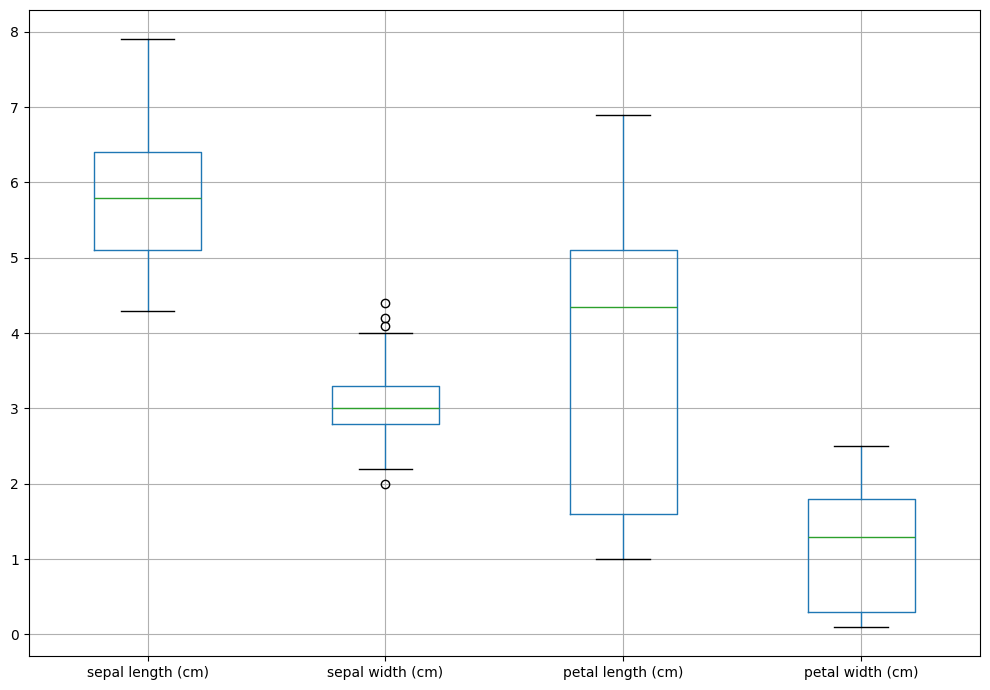

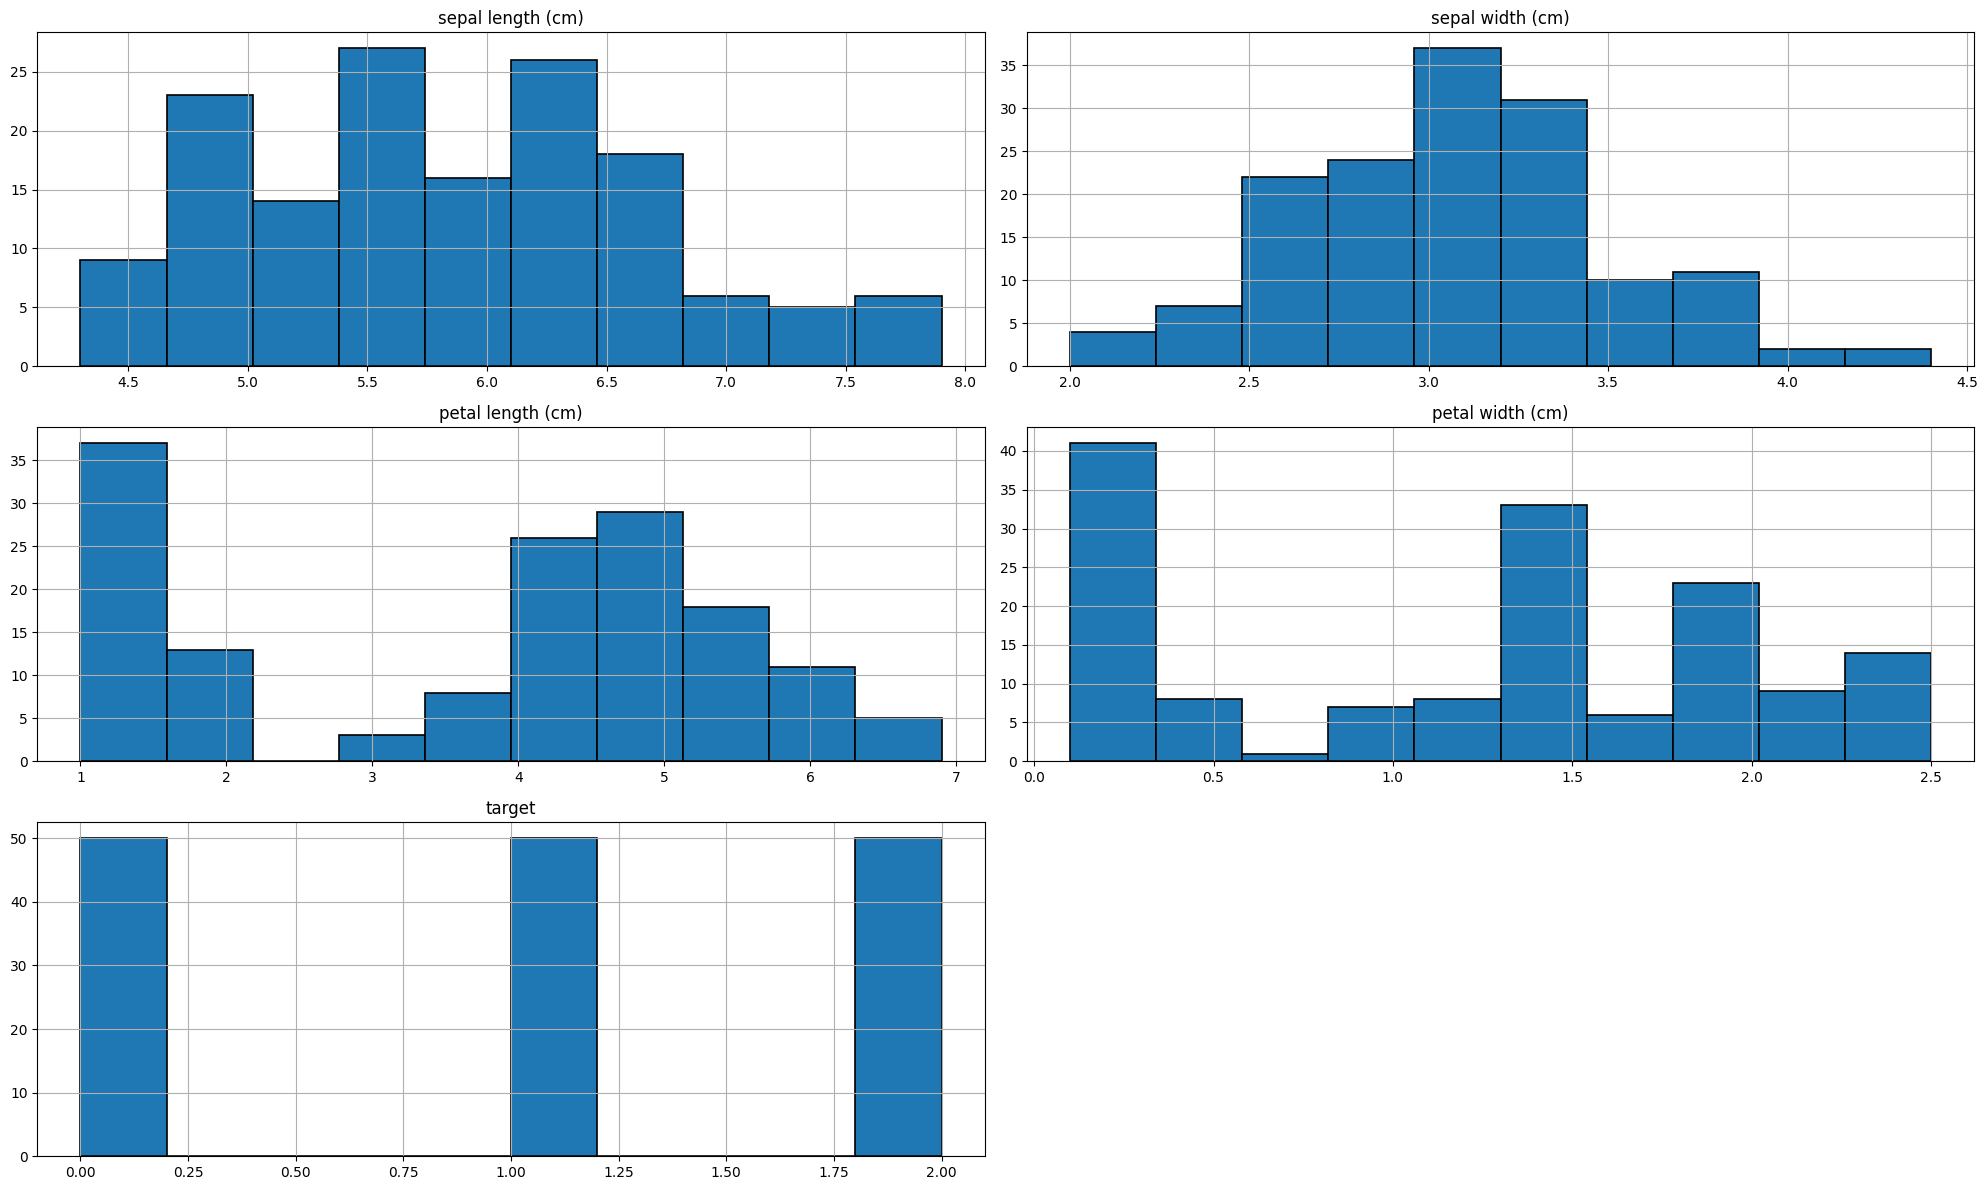

In [23]:
# Univariate Plots

plt.figure(figsize = (10, 7))

# box or whiskerplot of the features
dataset.boxplot(
    column=feature_names,
)
save_fig("Iris_whisker-plot")
plt.show()

# histograms of single features
# features and target
dataset.hist(edgecolor='black', linewidth=1.2)
# features only
#new_data.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(20,12)
save_fig("Iris_histogram-plot")
plt.show()

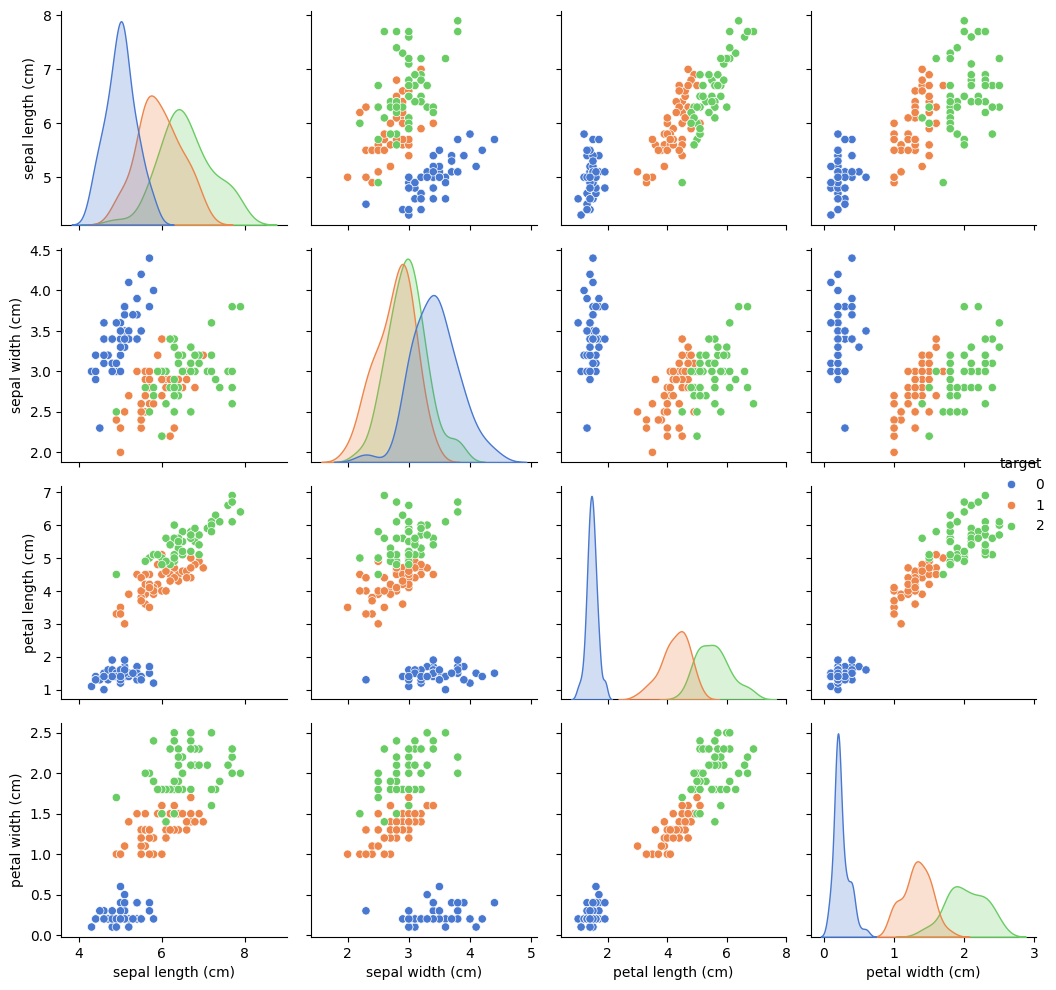

In [24]:
# Multivariate Plots: pairplot

# A pairplot contains various combination 
# of the features for visual inspection 
# of possible clustering and/or correlations

import seaborn as sns

# uses Seaborn
sns.pairplot(dataset, kind="scatter", 
             diag_kind="kde", hue="target",
             palette="muted", 
             plot_kws={'alpha':1.0}
            )

save_fig("Iris_pairplot")
plt.show()

##### Univariante plots:
Het lijkt erop dat misschien twee van de invoervariabelen een Gauss-verdeling hebben. Dit is handig om op te merken, omdat we algoritmen kunnen gebruiken die deze veronderstelling kunnen benutten.

**Oefening**: welke invoervariabelen zijn dat?

##### Multivariante plots:
Let op de diagonale groepering van enkele paren attributen. Dit suggereert een hoge correlatie en een voorspelbare relatie.

---
### 4. Modelleren met KNN algoritme.

Eerst passen we KNN alleen toe op de Iris dataset

We selecteren de eerste twee kolommen ('sepal-length' en 'sepal-width') als features: dit zijn de X-waarden. Als target selecteren we de irissoort (column 'class'), dit zijn de y-waarden.

Vervolgens delen we de data op in 80% trainings- en 20% testdata. Met de trainingsdata trainen we het model, de testdata gebruiken we om het model te valideren.

We gebruiken de methode `train_test_split()` uit package Scikit-Learn. Het argument `stratify=y` gebruiken we om in zowel de train- als testdata een gelijke verdeling van Iris soorten te krijgen.

In [25]:
# prepare data: Split-out validation dataset

# KNN requires numpy datatypes
# select two features: sepal-length and sepal-width
X = dataset[feature_names[:2]].to_numpy()
y = dataset['target'].to_numpy()

# size of test dataset
validation_size = 0.20  
seed = 42
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=validation_size,
    stratify=y,
    random_state=seed
)

Uit package Scikit-Learn gebruiken we het algoritme `KNeighborsClassifier`.

In [26]:
# Fitting KNN classifier to the Training set

# Loading libraries
from sklearn.neighbors import KNeighborsClassifier

# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

classifier

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


---
### 5. Maken van enkele voorspellingen.

Met de methode `predict()` kunnen we nu voor waarden voor 'sepal-length' en 'sepal-width' voorspellingen doen. We doen een voorspelling voor waarden voor de genoemde features:

In [27]:
new_sepal = [5,4]  # target=0 (setosa)
classifier.predict([new_sepal])

array([0])

Dit zou moeten zijn Iris soort 'setosa' (value 0) moeten zijn. We controleren dit visueel door een grafiek te maken.

Vordat we een grafiek met de Iris soorten maken, splitsen we de dataset in aparte Iris soort datasets:

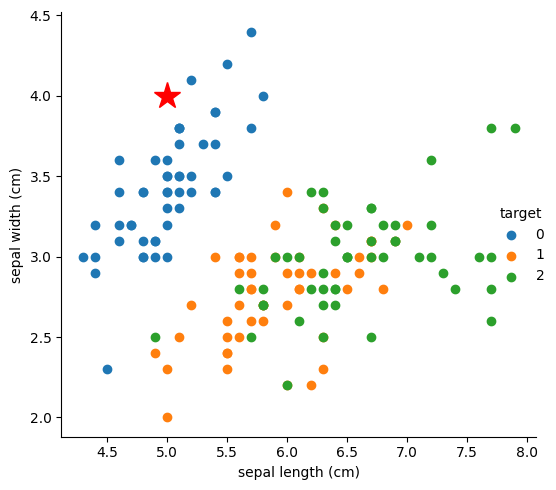

In [28]:
# plot facetGrid with 
# x:sepal-length and y:sepal-width

sns.FacetGrid(dataset,hue='target',height=5)\
.map(plt.scatter,feature_names[0],feature_names[1])\
.add_legend()

# plot our new sepal values
plt.plot(new_sepal[0], new_sepal[1],
         'r*', markersize=20)


save_fig("Iris-FacetGrid_prediction")
plt.show()

---
### 4. Modelleren met meerdere algoritmen

Nu is het tijd om enkele modellen van de gegevens te maken en hun nauwkeurigheid te schatten op ongeziene gegevens. Dit is wat we in deze stap gaan behandelen:

1. Maak een trainings- en een validatiedataset.
2. Opzetten van een test om 10-voudige kruisvalidatie te gebruiken.
3. Bouw 5 verschillende modellen om soorten te voorspellen op basis van de bloem-metingen 
4. Selecteer het beste model.

We moeten weten of het model dat we hebben gemaakt goed is.

We willen ook een meer concrete schatting van de nauwkeurigheid van het beste model op ongeziene gegevens door het te evalueren op werkelijke ongeziene gegevens. Dat wil zeggen, we gaan enkele gegevens achterhouden die de algoritmen niet te zien krijgen en we zullen deze gegevens gebruiken om een tweede en onafhankelijk idee te krijgen van hoe nauwkeurig het beste model eigenlijk zou kunnen zijn. 

We splitsen de geladen dataset in tweeën, 80% waarvan we onze modellen zullen trainen en 20% die we achterhouden als validatiedataset.

We zullen ook een 10-voudige kruisvalidatie (`KFold`) gebruiken om de nauwkeurigheid van ongeziene gegevens te schatten. Dit zal onze dataset in 10 delen splitsen, b.v. het model zal trainen op 9 en testen op 1 en herhalen voor alle combinaties van train-test splitsingen. 

We gebruiken de metriek nauwkeurigheid (`cross_val_score`) om modellen te evalueren. Dit is een percentage van het aantal correct voorspelde instanties gedeeld door het totale aantal instanties in de dataset vermenigvuldigd met 100 om een percentage te geven (bijvoorbeeld 95% nauwkeurig). 

We zullen de scorevariabele gebruiken wanneer we elk model bouwen en evalueren.

In [29]:
# Prepare Data

# Split-out validation dataset
# select all features
# get list of feature names
#feature_names = [
#    dataset.columns[i] for i in range(4)
#]
X = dataset[feature_names].to_numpy() # all features!
y = dataset['target'].to_numpy()

# size of validation dataset,
# also called test dataset
validation_size = 0.20  
seed = 42
X_train, X_validation, y_train, y_validation = train_test_split(
    X, y, 
    test_size=validation_size, 
    random_state=seed
)

### Classificatiemodellen

We stellen een lijst met classificatiemodellen samen voor training en validatie (testen), omdat we niet weten welke algoritme zou goed zijn voor dit probleem:
- Logistic Regression (LR)
- Linear Discriminant Analysis (LDA)
- k-nearest neighbors (KNN)
- Classification and Regression Trees (CART)
- Gaussian Naive Bayes (NB)
- Support Vector Machine (SVM)

Deze lijst is een goede mix van eenvoudige lineaire algorithmen (LR en LDA) en niet-lineaire algorithmen (KNN, CART, NB en SVM).

We resetten het `random number seed` voor elke run om ervoor te zorgen dat de evaluatie van elk algoritme wordt uitgevoerd met behulp van precies dezelfde gegevenssplitsingen. Het zorgt ervoor dat de resultaten direct vergelijkbaar zijn.

In [30]:
# Spot-Check Algorithms

models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [31]:
# evaluate each model in turn

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, 
                                 X_train, y_train, 
                                 cv=kfold, 
                                 scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = f"{name}:{cv_results.mean():.3f} ({cv_results.std():.3f})"
    print(msg)


LR:0.925 (0.087)
LDA:0.967 (0.055)
KNN:0.950 (0.067)
CART:0.925 (0.079)
NB:0.942 (0.075)
SVM:0.958 (0.067)


c:\Users\hq0132410\Downloads\Introduction-to-machine-learning\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\hq0132410\Downloads\Introduction-to-machine-learning\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
c:\Users\hq0132410\Downloads\Introduction-to-machine-learning\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(Logisti

We hebben nu 6 modellen en nauwkeurigheidsschattingen voor elk. We moeten de modellen met elkaar vergelijken en de meest nauwkeurige selecteren. Als we het bovenstaande voorbeeld uitvoeren, krijgen we de volgende onbewerkte resultaten.

We kunnen zien dat het lijkt alsof KNN (maar vaak ook SVM) de grootste geschatte nauwkeurigheidsscore heeft. Wegens het random karakter is het aan te raden diverse keren de modellen te trainingen en dan aan de `cross_val_score` te kijken welke er gemiddeld het beste uitkomt.

We kunnen ook een grafiek maken van de resultaten van de modelevaluatie en de spreiding en de gemiddelde nauwkeurigheid van elk model vergelijken. Er is een populatie van nauwkeurigheidsmetingen voor elk algoritme omdat elk algoritme 10 keer is geëvalueerd (10-voudige kruisvalidatie).

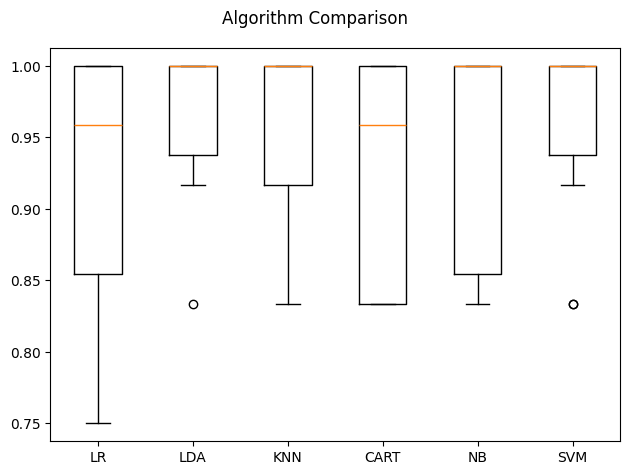

In [32]:
# Compare Algorithms

fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
# optional: 
save_fig("KNN_Iris-Algorithm-Comparison")
pyplot.show()


Je kunt zien dat de box- en whisker-plots aan de bovenkant van het bereik zijn geplet, waarbij veel steekproeven een nauwkeurigheid van 100% bereiken.

We nemen het KNN-algoritme als zijnde het meest nauwkeurige model dat we hebben getest. Nu willen we een idee krijgen van de nauwkeurigheid van het model op onze validatiedataset. Dit geeft ons een onafhankelijke eindcontrole op de juistheid van het beste model. 

Het is belangrijk om een validatieset te bewaren voor het geval je tijdens de training een slip hebt gemaakt, zoals overfitting op de trainingsset. Dat zal  resulteren in een te optimistisch resultaat. 

We kunnen het KNN-model rechtstreeks op de validatieset draaien en de resultaten samenvatten als een uiteindelijke nauwkeurigheidsscore, een confusion matrix en een classificatierapport.

In [33]:
# Make predictions on validation dataset

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)  # train the model

# make predictions
predictions = knn.predict(X_validation)

print(f"Accuracy score: {accuracy_score(y_validation, predictions)}")
print(f"Confusion matrix:\n {confusion_matrix(y_validation, predictions)}")
print(f"Classication report:\n {classification_report(y_validation, predictions)}")

Accuracy score: 1.0
Confusion matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classication report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



We kunnen zien dat de nauwkeurigheid van de orde van 0,9 ofwel 90% is, ofwel hoger! 

De *confusion matrix* geeft een indicatie van de gemaakte fouten. 

Ten slotte geeft het classificatierapport een uitsplitsing van elke klasse in *precision*, *recall* en *f1-score* met uitstekende resultaten (ondanks dat de validatiegegevensset klein was).

---
